### **Regularized Regression to Predict Housing Prices in Boston**

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the dataset

The dataset that we are going to explore and build the ML model is Boston Dataset. Let's familiarize ourself with the dataset by doing exploratory data analysis.

There are 14 attributes in each case of the dataset. They are:
- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per 10000 in dollar
- PTRATIO : pupil-teacher ratio by town
- BLACK : is the proportion of blacks by town
- LSTAT : % lower status of the population
- MEDV : Median value of owner-occupied homes in $1000's

our target variable is medv : predicting housing price

### **Eksploratory Data Analysis**

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Linear Regression/Tugas Linear Regression/boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# sample 10 rows of the data
df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
269,0.09065,20.0,6.96,1,0.464,5.920,61.5,3.9175,3,223,18.6,391.34,13.65,20.7
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264,13.0,392.40,10.45,22.8
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6
394,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7
44,0.12269,0.0,6.91,0,0.448,6.069,40.0,5.7209,3,233,17.9,389.39,9.55,21.2
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666,20.2,355.29,17.73,15.2
251,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,377.07,3.59,24.8
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
87,0.07151,0.0,4.49,0,0.449,6.121,56.8,3.7476,3,247,18.5,395.15,8.44,22.2


**Observations:**
* all data is in numerical, where chas is apparently binary (0,1).
* No obvious defects are identified in the data, and the column names align with their respective entries.

In [ ]:
#check rows with contains white space
df.eq(' ').sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
# check missing value
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
#show info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# number of duplicated data
df.duplicated().sum()

0

Observations:
* The dataset is clean: **no missing values** or **duplicate entries**, and all data is in numerical format. Overall is good!
* the dataset comprises **14 columns** and a total of **506 rows**.

In [ ]:
# numerical statistical summary
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observations:

1. **Crime Rate (crim):** The crime rate per capita varies a lot, from as low as 0.006 to as high as 88.97. The highest value seems like an outlier because it's very different from the median and the 75th percentile value.

2. **Residential Land Proportion (zn):** The proportion of residential land allocated for large lots (over 25,000 square feet) ranges from 0 to 100. The median value is 0, indicating that in many cities, there's no residential land allocated for large lots.

3. **Non-Retail Business Land Proportion (indus):** The proportion of non-retail business land per city varies from 0.46 to 27.74, with an average around 11.14. The high standard deviation shows significant variation in this proportion among cities.

4. **Charles River Border (chas):** This is a binary variable indicating whether a city borders the Charles River. About 93% of cities do not border it.

5. **Nitric Oxide Concentration (nox):** The concentration of nitric oxide ranges from 0.385 to 0.871, with an average around 0.55. This indicates differences in air pollution levels among cities.

6. **Average Number of Rooms (rm):** The average number of rooms per dwelling ranges from 3.561 to 8.78, with an average around 6.28. The low standard deviation suggests consistent room numbers in most houses.

7. **Age of Buildings (age):** The proportion of owner-occupied units built before 1940 ranges from 2.9% to 100%. The average age of buildings is around 68 years.

8. **Distance to Employment Centers (dis):** The weighted distances to five Boston employment centers vary greatly, with an average around 3.80 and a maximum of 12.13.

9. **Accessibility to Highways (rad):** The accessibility index to radial highways ranges from 1 to 24, with an average around 9.55.

10. **Property Tax Rate (tax):** The full property tax rate per $10,000 ranges from 187 to 711, with an average around 408.24.

11. **Pupil-Teacher Ratio (ptratio):** The ratio of students to teachers per city ranges from 12.6 to 22, with an average around 18.46.

12. **Percentage of Black Population (black):** The percentage of black residents per city ranges from 0.32 to 396.9.

13. **Percentage of Lower Status Population (lstat):** The percentage of population with lower social status ranges from 1.73 to 37.97, with an average around 12.65.

14. **Median Home Value (medv):** The median value of owner-occupied homes ranges from $5,000 to $50,000, with an average around $22,530.

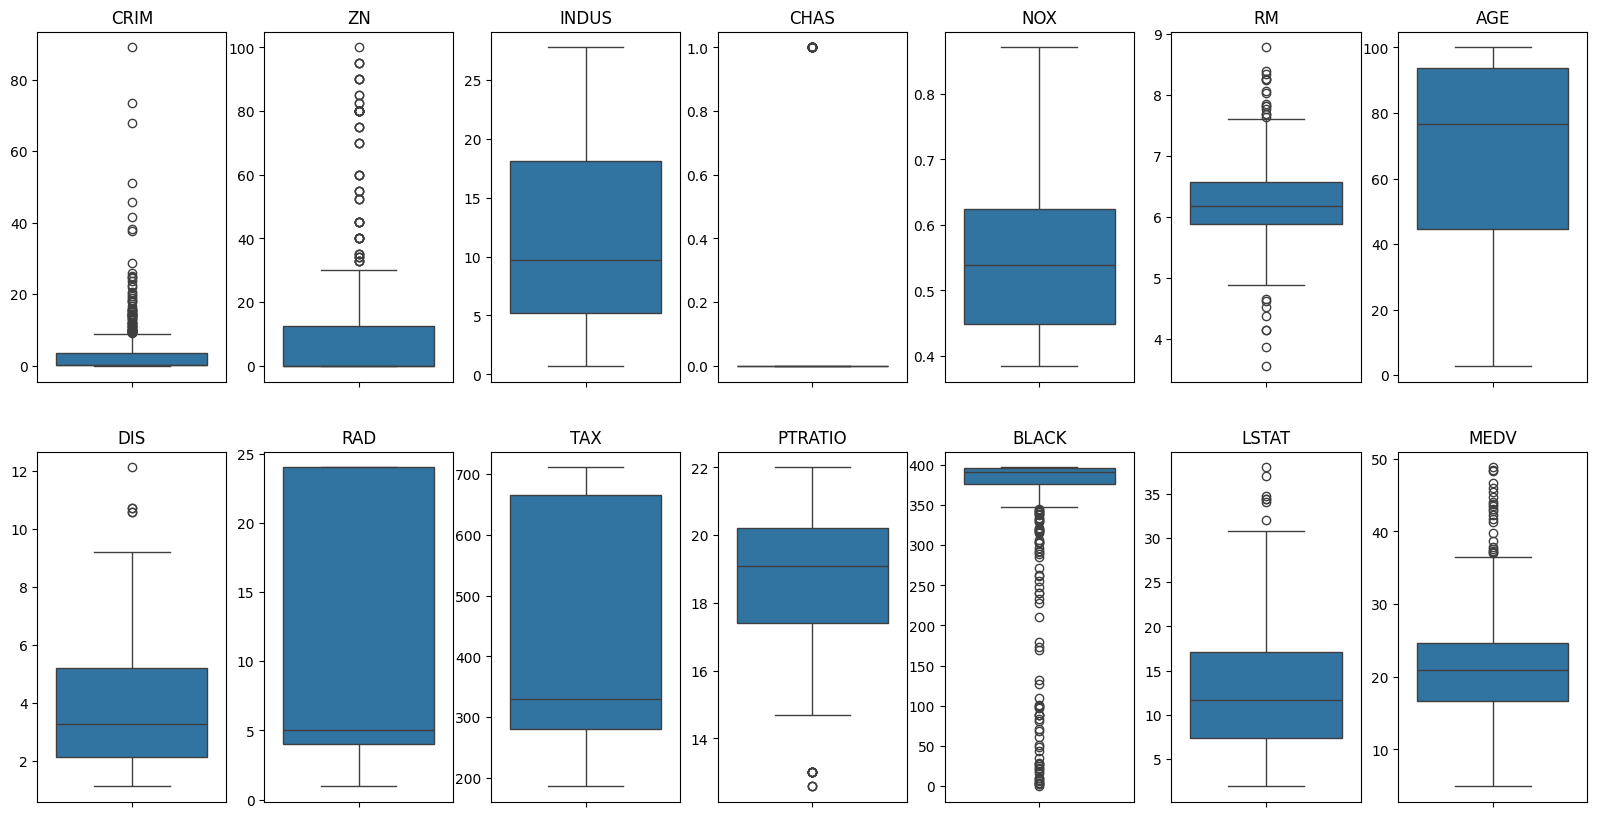

In [ ]:
#Boxplot to detect outliers
fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()):
    plot = sns.boxplot(data=df, y=df.columns[index], ax=axs)
    plot.set(xlabel='', ylabel='', title=df.columns[index].upper())

Observations:
* For `Chas` outliers might not be as relevant since it's a binary variable.
* It appears that `CRIM`, `ZN`, `RM`, `DIS`, `PTRATIO`, `BLACK`, `LSTAT`, and `MEDV` have many outliers based on the plots.

The question arises: should we remove these outliers? To address this, we need to further investigate.

First, let's calculate the percentage of outliers in each feature.

In [ ]:
outliers_list = []

for col in df.columns:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)

    IQR  = percentile75 - percentile25

    upper_limit = percentile75 + 1.5*IQR
    lower_limit = percentile25 - 1.5*IQR

    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    percentage = outliers.shape[0] / df.shape[0] * 100

    outlier_dict = {'Feature' : col.upper(),
                    'Outlier Percentage' : f'{percentage:.2f}' + '%'}

    outliers_list.append(outlier_dict)

# display it using dataframe for better reading
outlier_df = pd.DataFrame(outliers_list)
outlier_df

,Feature,Outlier Percentage
0,CRIM,13.27%
1,ZN,13.27%
2,INDUS,0.00%
3,CHAS,5.92%
4,NOX,0.00%
5,RM,4.69%
6,AGE,0.00%
7,DIS,1.02%
8,RAD,0.00%
9,TAX,0.00%


Observations:

Features with outlier > 5% are concerning. The outliers are too much. This outliers can be caused by many error, it can be measurement error, wrong data collection, or wrong data entry. However, not all the outliers bad. Deleting all the outlier outside the upper_limit and lower_limit of **interquantile calculation*** above is not a good option either, since it can reduce our dimesion too much. The model might find it hard to learn if we have small dimension. So we just need to be a little bit smart how to deal with this outlier.

Note from dataset (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

Variable #14 seems to be censored at 50.00 (corresponding to a median price of 50,000); Censoring is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.

This indicates that there's a limitation in the data, where the actual prices might be higher but are censored to $50,000.


It's suggested by the fact that many houses could have higher prices but are recorded as $50,000. So, let us remove all the data in ourdataframe of MEDV == 50.00

In [ ]:
#Percentage of outliers removed
medv_50 = df[(df['medv'] == 50.0)]
percentage = medv_50.shape[0]/df.shape[0]*100

print(f'Persentage medv=50.0 : {percentage:.2f}' + '%')

Persentage medv=50.0 : 0.00%


The percentage of removed outliers is 16/506, approximately 3.16%, which is less than 5% of the entire dataset. Therefore, it is considered okay.






In [ ]:
# remove outliers if medv == 50.00
df = df[~(df['medv'] == 50.0)]

Good!

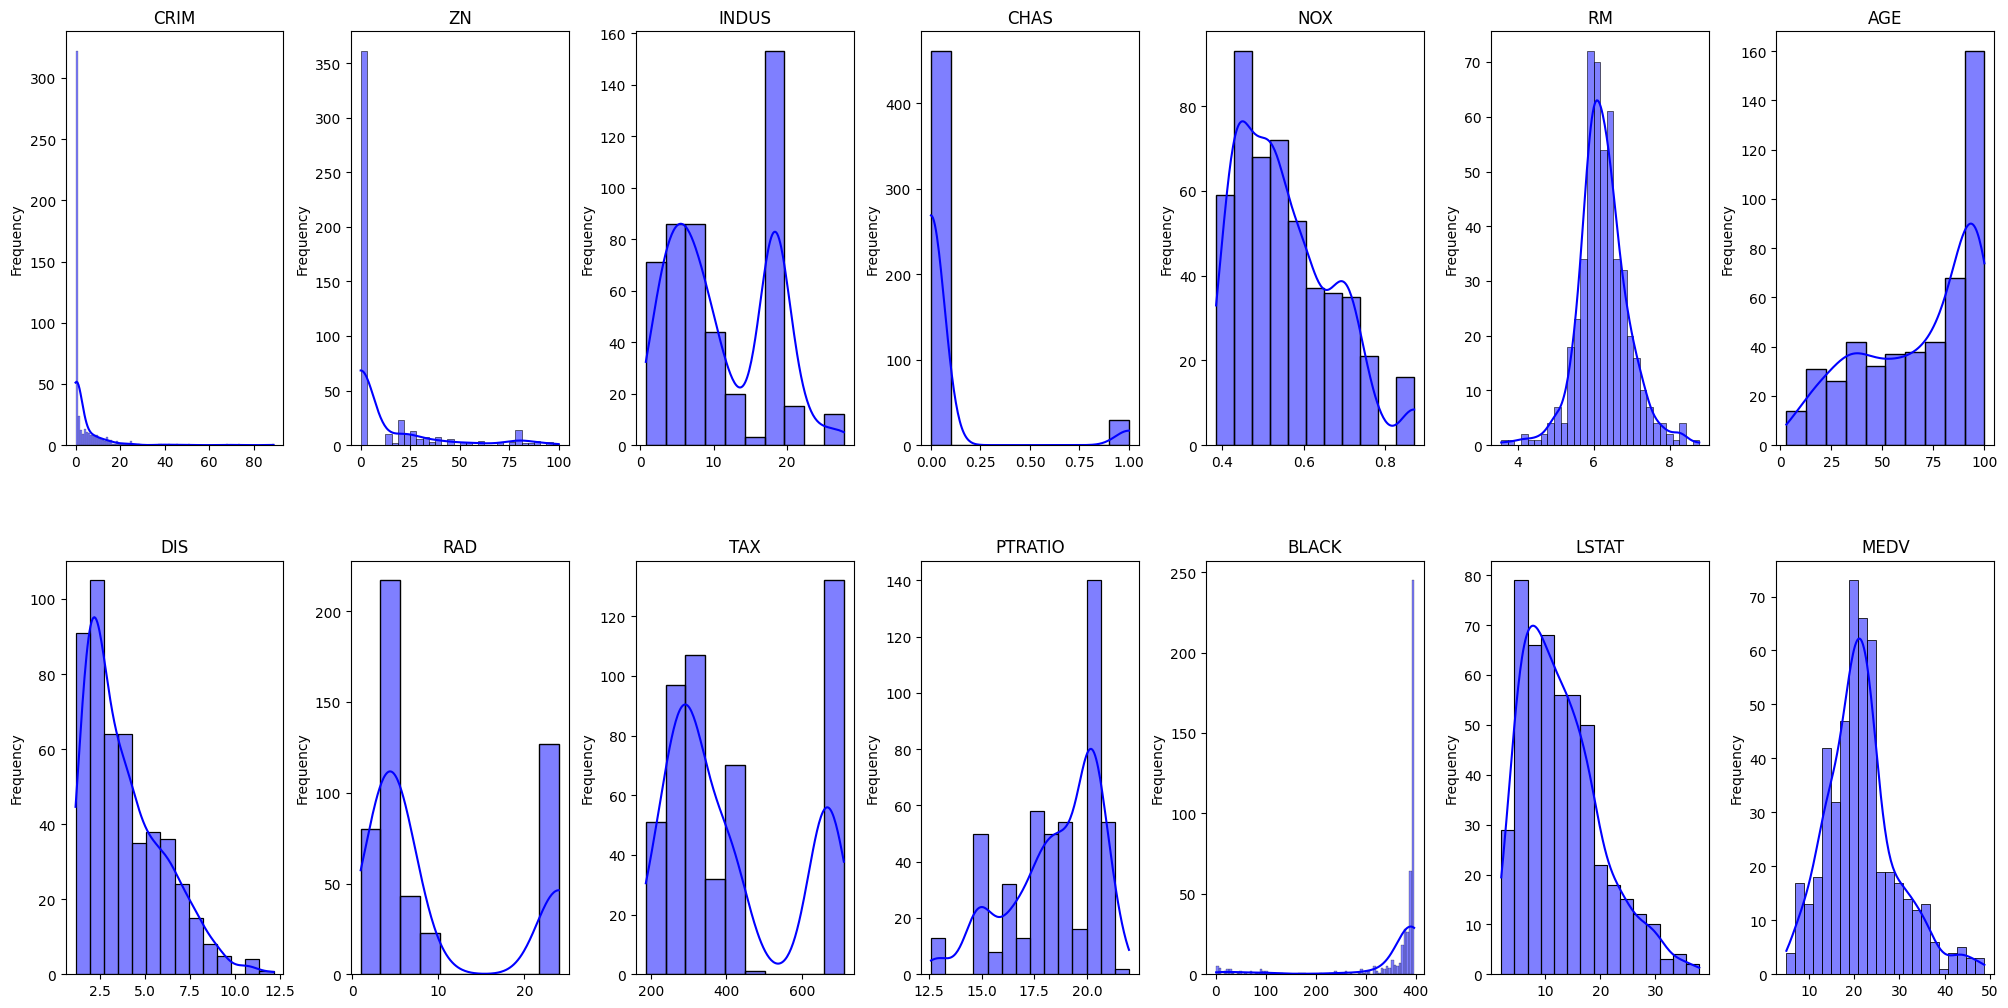

In [ ]:
#KDE plot for knowing the distribution form
fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()):
    plot = sns.histplot(data=df, x=df.columns[index], color='blue', kde=True, ax=axs)
    plot.set(xlabel='', ylabel='Frequency', title=df.columns[index].upper())

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Observations:

* As we can see on the graph above, the feature which normally distributed is only `RM`. Column `MEDV` is a litlle bit skewed to the left, but show a normal distribution properties.
* Other features show either they're skewed to the left or to the right.
* The variables `CRIM`, `ZN`, `NOX`, `DIS`, and `LSTAT` exhibit a left-skewed distribution, meaning they tend to have lower values. This suggests that most areas have low crime rates, small residential land proportions, low nitrogen oxide levels, short distances to workplaces, and high percentages of economically disadvantaged residents.
* The presence of two peaks in the distributions of `INDUS`, `RAD`, and `TAX` indicates the existence of two different groups or categories within each variable
* `PTRATIO` (pupil-teacher ratio) and `Black` (proportion of black residents) are skewed to the right. For PTRATIO, this suggests fewer students per teacher on average, while for Black, it indicates fewer towns with a higher proportion of black residents.
* for `CHAS `(Charles River dummy variable), it means that more towns do not border the Charles River than those that do. In simpler terms, there are more towns without riverfront access than those with it.

In [ ]:
features_cols = df.columns[:-1]

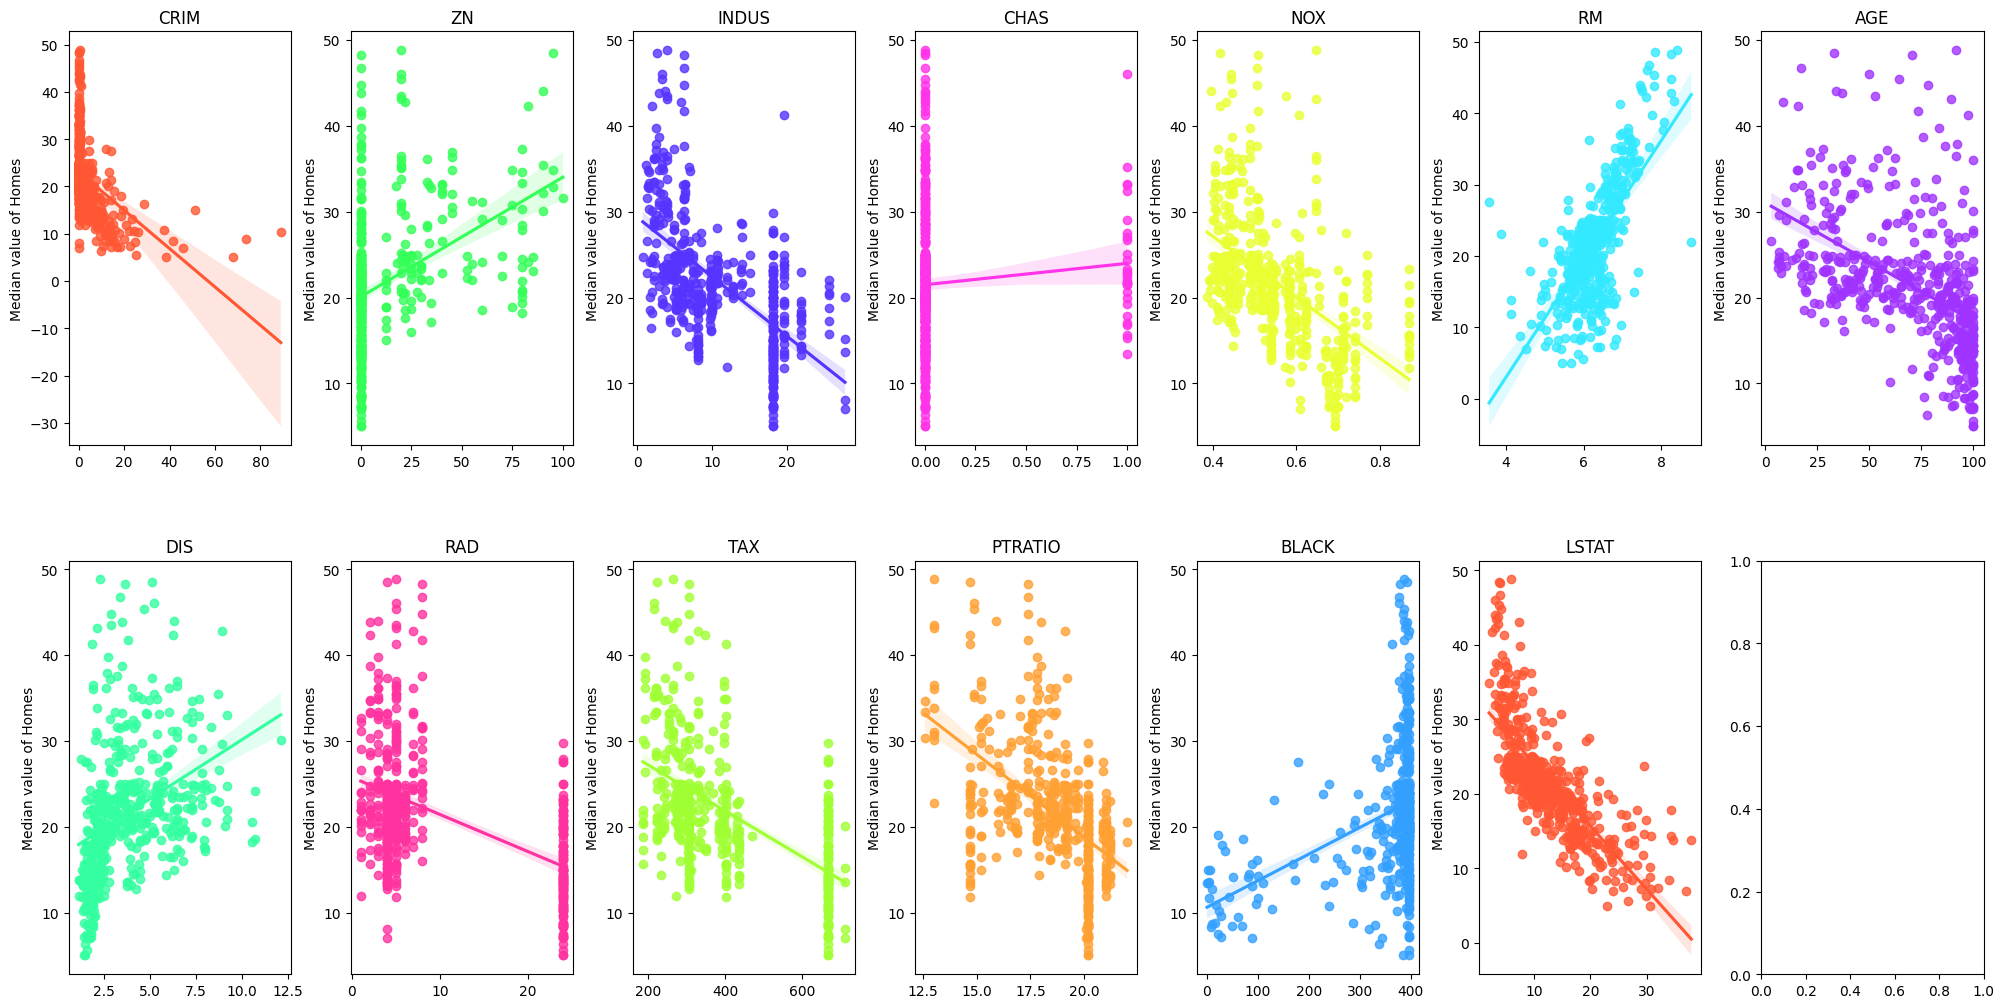

In [ ]:
fig, axes = plt.subplots(2,7, figsize=(20,10))

colors = ['#FF5733', '#33FF57', '#5733FF', '#FF33E9', '#E9FF33', '#33E9FF', '#A033FF', '#33FFA0', '#FF33A0', '#A0FF33', '#FFA033', '#33A0FF', '#FF5733', '#33FF57']

for index, axs in enumerate(axes.flatten()[:len(features_cols)]):
    plot = sns.regplot(x=features_cols[index], y='medv', data=df, ax=axs, color=colors[index])
    plot.set(xlabel='', ylabel='Median value of Homes', title=features_cols[index].upper())

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Observations:
* Feature `RM` and `LSTAT` have a high linearity relationship with our target variable. This mean `RM` and `LSTAT` are very important feature to predict our target value.
* `CHAS` seems not good to view it using Regplot since the value is only 1.0 and 0.0, a binary value.
* The other feature, even though are not show high correlation score toward `MEDV`, but still show us a linearity relationship with our target variable.

### **Preprocessing**

### **Split data: train-validation-test**

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df['medv']

# First splitting: pretrain and test
X_train_temp, X_test, y_train_temp, y_test = train_test_split(feature,
                                                              target,
                                                              test_size = 0.2,
                                                              random_state = 42)

# Second splitting: train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_temp,
                                                  y_train_temp,
                                                  test_size = 0.2,
                                                  random_state = 42)

In [ ]:
#Check the shape of the train, test, and validation data

# feature and target shape
print('Feature shape before split : {}'.format(feature.shape))
print('Target shape before split : {}'.format(target.shape))
print()

# train shape, we take 60% from the original data
print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))
print()

# test shape, we take 20% from the original data
print('X_test shape : {}'.format(X_test.shape))
print('y_test shape : {}'.format(y_test.shape))
print()

# validation shape, we take 20% from the original data
print('X_val shape : {}'.format(X_val.shape))
print('y_val shape : {}'.format(y_val.shape))

Feature shape before split : (490, 13)
Target shape before split : (490,)

X_train shape : (313, 13)
y_train shape : (313,)

X_test shape : (98, 13)
y_test shape : (98,)

X_val shape : (79, 13)
y_val shape : (79,)


In [ ]:
# Check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],
                      index = X.columns).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,crim,2.079488
2,zn,2.418546
3,indus,3.811354
4,chas,1.049900
5,nox,4.654454
6,rm,1.923483
7,age,3.101301
8,dis,4.071004
9,rad,8.739623
10,tax,10.040523


There are several features with high VIF scores (VIF between 4 and 10 indicate Moderate multicollinearity)
1. `nox`
2. `rad`
3. `tax`
4. `dis`

### **Correlation Analysis and Feature Selection**

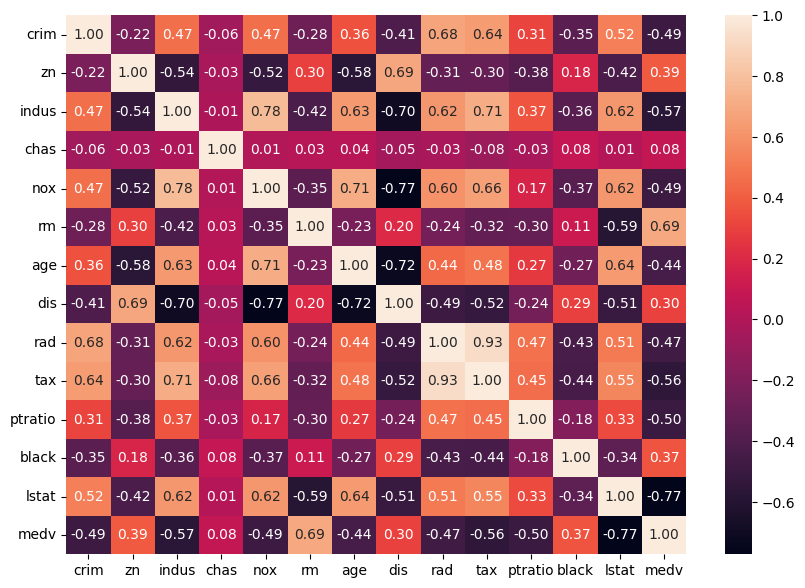

In [ ]:
# heatmap correlation
medv_train = pd.concat([X_train, y_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

According to the correlation matrix, we see that there are some positive and negative correlation from our features towards our target variable

| Feature | Correlation Value |
|---------| ----------------- |
| ZN | 0.39 |
| CHAS | 0.08 |
| RM | 0.69 |
| DIS | 0.30 |
| BLACK | 0.37 |
| CHRIM | -0.49 |
| INDUS | -0.57 |
| NOX | -0.49 |
| AGE | -0.44 |
| RAD | -0.47 |
| TAX | -0.56 |
| PTRATIO | -0.50 |
| ISTAT | -0.77 |

Another interesting insight from the correlation matrix is the presence of several independent variables that have quite high correlations with each other.

| Feature - Feature	| Correlation Value |
| ----------------- | ----------------- |
| RAD - TAX |	0.93 |
| DIS - NOX	| 0.77 |
| NOX - INDUS |	0.78 |
| DIS - AGE |	0.72 |
| NOX - AGE |	0.71 |
| TAX - INDUS |	0.71 |
| DIS - INDUS	| 0.70 |



If we set the threshold for high correlation to be >= 0.8, one concerning correlation is between `RAD` and `TAX`. They are highly correlated despite being independent variables. This situation is not desirable as it can potentially affect our model later on. Therefore, we need to drop one of them.

Observing that TAX has a higher correlation with `MEDV`(the target variable), we will drop `RAD`. As for the other variables, their correlations are below 0.8, thus they do not meet the threshold and we will keep them without dropping any.

In [ ]:
# Drop Multicollinear Features
X_train = X_train.drop(columns = 'rad')
X_test = X_test.drop(columns = 'rad')
X_val = X_val.drop(columns = 'rad')

In [ ]:
#recheck VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.906069
2,zn,2.371356
3,indus,3.722671
4,chas,1.028264
5,nox,4.635049
6,rm,1.867534
7,age,3.096115
8,dis,4.063339
9,tax,3.471013
10,ptratio,1.676612


Good!

### **Model**

## **Linear regression**

### **model training**

In [ ]:
from sklearn.linear_model import LinearRegression

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

simple_reg = LinearRegression()
simple_reg.fit(X_train_np, y_train_np)

LinearRegression()

In [ ]:
# Interpreting the coefficient and intercept
coef_df = pd.DataFrame(
    {'intercept' : ['intercept'] + X_train.columns.to_list(),
     'coefficient' : [simple_reg.intercept_] + list(simple_reg.coef_)})
coef_df

,intercept,coefficient
0,intercept,26.701827
1,crim,-0.087868
2,zn,0.040944
3,indus,-0.098367
4,chas,1.392273
5,nox,-7.709949
6,rm,3.447090
7,age,-0.005678
8,dis,-1.253461
9,tax,-0.001913


Median Home Value = 26.701827 - 0.087868 CRIM + 0.040944 ZN - 0.098367 INDUS + 1.392273 CHAS - 7.709949 NOX + 3.447090 RM - 0.005678 AGE - 1.253461 DIS - 0.001913 TAX - 0.672109 PTRATIO + 0.009092 BLACK - 0.481815 ISTAT

**Interpretation:**

* If all factors such as crime rate, proportion of residential land zoned for larger lots, industrial proportion, etc., are absent or have no effect, we would expect the median house price to be around $26,701.827.

* For every additional unit rise in the per capita crime rate (`CRIM`), we anticipate a decrease in the median value of owner-occupied homes (MEDV) by approximately 0.087868 units, assuming all other factors remain unchanged.
* For each 1-unit increase in the proportion of residential land zoned for larger lots (`ZN`), MEDV is expected to increase by 0.040944 units, assuming other variables remain constant.
* For each unit increase in the proportion of non-retail business land (`INDUS`), the median value of owner-occupied homes decreases by approximately 0.098367 units.
* Being near the Charles River (`CHAS`) increases the median value of owner-occupied homes by approximately 1.392273 units.
* For each 1-unit increase in the average number of rooms per dwelling (`RM`), MEDV is expected to increase by 7.709949 units, assuming other variables remain constant.
* For each 1-unit increase in the proportion of owner-occupied units built before 1940 (`AGE`), MEDV is expected to decrease by 0.005678 units, holding other variables constant.
* For each 1-unit increase in the weighted distance to five Boston employment centers (`DIS`), MEDV is expected to decrease by 1.253461 units, assuming other variables remain constant.
* For each 1-unit increase in the full-value property-tax rate per $10,000 (`TAX`), MEDV is expected to decrease by 0.001913 units, holding other variables constant.
* For each 1-unit increase in the pupil-teacher ratio by town (`PTRATIO`), MEDV is expected to decrease by 0.672109 units, assuming other variables remain constant.
* For each 1-unit increase in the proportion of Black residents (`BLACK`), MEDV is expected to increase by 0.009092 units, holding other variables constant.
* For each 1-unit increase in the percentage of lower status of the population (`LSTAT`), MEDV is expected to decrease by 0.481815 units, assuming other variables remain constant.


### **Model Diagnostic**

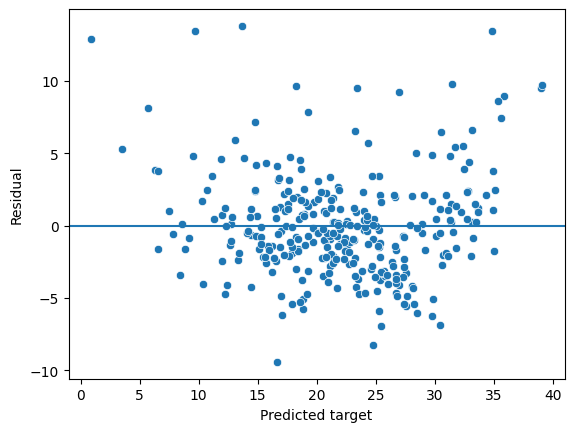

In [ ]:
# Calculate residuals
y_predict_train = simple_reg.predict(X_train_np)
residual = y_train_np - y_predict_train

df_resid = pd.DataFrame(
    {'x_axis' : y_predict_train,
     'residual' : residual})

# Residual plot
plot = sns.scatterplot(data = df_resid, x = 'x_axis', y = 'residual')
plot.set(xlabel = 'Predicted target', ylabel = 'Residual')
plt.axhline(0)

Assumptions:


The observations indicate a linear relationship between variables, evidenced by the horizontal line y=0 for residual points, there are no connections between residuals across different observations, and there are no clear patterns in consecutive residuals.

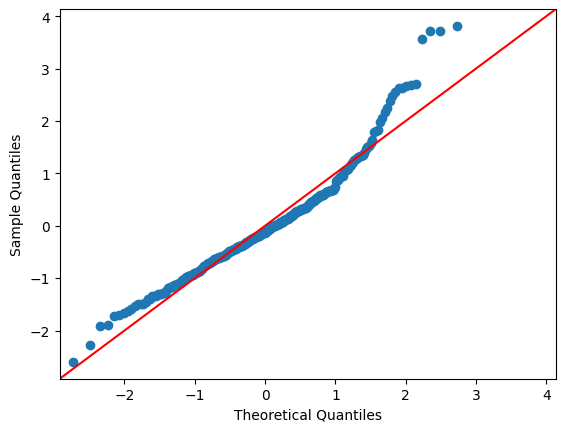

In [ ]:
#QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

Transformed residuals closely align with the normality line, indicating normally distributed residuals.

### **Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = [X_train.to_numpy(), X_test.to_numpy(), X_val.to_numpy()]
y = [y_train.to_numpy(), y_test.to_numpy(), y_val.to_numpy()]
index = ['Training', 'Test', 'Validation']

accuracy_list = []
for i in range(len(X)):
    y_predict = simple_reg.predict(X[i])
    r2 = r2_score(y[i], y_predict)
    rmse = np.sqrt(mean_squared_error(y[i], y_predict))

    accuracy = {'Index' : index[i],
                'R_squared' : r2,
                'RMSE' : rmse}

    accuracy_list.append(accuracy)

df_accuracy = pd.DataFrame(accuracy_list)

In [ ]:
df_accuracy

,Index,R_squared,RMSE
0,Training,0.782266,3.623401
1,Test,0.728832,3.721923
2,Validation,0.694277,4.845747


Interpretation :

* The training dataset demonstrates an R-squared value of 0.782266, indicating that approximately 78.23% variability of medv is successfully explained using all the features in the model, with an associated RMSE of 3.623401. It's mean the standard deviation of prediction errors is 3.62, i.e from the regression line, the residuals mostly deviate between +- 3.62

* In the test dataset, the R-squared value is 0.728832, suggesting that around 72.88% of the variance is explained by the model, with an RMSE of 3.721923.  It's mean the standard deviation of prediction errors is 3.72, i.e from the regression line, the residuals mostly deviate between +- 3.72

* For the validation dataset, the model exhibits an R-squared value of 0.694277, meaning approximately 69.43% of the variance is explained, with an RMSE of 4.845747.  It's mean the standard deviation of prediction errors is 4.85, i.e from the regression line, the residuals mostly deviate between +- 4.85

In this case, the obtained R-squared values (0.782266 for training, 0.728832 for test, and 0.69427 for validation) suggest that the model performs reasonably well in explaining the variance in the target variable.

The RMSE values obtained (3.623401 for training and 3.721923 for test) are relatively low, indicating satisfactory predictive performance.

## **Ridge regression**

### **model training**

In [ ]:
from sklearn.linear_model import Ridge

alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    ridge = Ridge(alpha = al, random_state = 42)
    ridge.fit(X_train.to_numpy(), y_train.to_numpy())

    y_predict_ridge = ridge.predict(X_val.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_predict_ridge))
    print('RMSE ridge for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE ridge for alpha : 0.01, is 4.846384301222291
RMSE ridge for alpha : 0.1, is 4.851736861001828
RMSE ridge for alpha : 1, is 4.8821556493298885
RMSE ridge for alpha : 10, is 4.930795124733116


We can see that Ridge with `alpha=0.01` has the smalles RMSE --> The best model

In [ ]:
# Since RMSE calculation from alpha = 0.01 gives the lowest value, we will use alpha = 0.01 further in the model

ridge = Ridge(alpha = 0.01, random_state = 42)
ridge.fit(X_train.to_numpy(), y_train.to_numpy())

Ridge(alpha=0.01, random_state=42)

In [ ]:
# Interpreting the coefficient and intercept
coef_ridge_df = pd.DataFrame(
    {'intercept' : ['intercept'] + X_train.columns.to_list(),
     'coefficient' : [ridge.intercept_] + list(ridge.coef_)})
coef_ridge_df

,intercept,coefficient
0,intercept,26.642949
1,crim,-0.087852
2,zn,0.040947
3,indus,-0.098724
4,chas,1.391230
5,nox,-7.627625
6,rm,3.447913
7,age,-0.005746
8,dis,-1.252021
9,tax,-0.001928


Median Home Value = 26.642949 - 0.087852 CRIM + 0.040947 ZN - 0.098724 INDUS + 1.391230 CHAS - 7.627625 NOX + 3.447913 RM - 0.005746 AGE - 1.252021 DIS - 0.001928 TAX - 0.671182 PTRATIO + 0.009096 BLACK - 0.481908 ISTAT

**Interpretation:**

- If all factors such as crime rate, proportion of residential land zoned for larger lots, industrial proportion, etc., are absent or have no effect, we would expect the median house price to be around $26.642949.

- For every one-unit increase in the per capita crime rate (`crim`), the expected value of MEDV decreases by approximately 0.087852, assuming all other factors remain unchanged.
- For every one-unit increase in the proportion of residential land zoned for lots over 25,000 sq. ft. (`zn`), the expected value of MEDV increases by approximately 0.040947, assuming other variables remain constant.
- For every one-unit increase in the proportion of non-retail business acres per town (`indus`), the expected value of MEDV decreases by approximately 0.098724, assuming other variables remain constant.
- The presence of the Charles River (`chas`) in the town increases the expected value of MEDV by approximately 1.391230, assuming other variables remain constant.
- For every one-unit increase in nitric oxides concentration (`nox`), the expected value of MEDV decreases by approximately 7.627625, assuming other variables remain constant.
- For every one-unit increase in the average number of rooms per dwelling (`rm`), the expected value of MEDV increases by approximately 3.447913, assuming other variables remain constant.
- For every one-unit increase in the proportion of owner-occupied units built before 1940 (`age`), the expected value of MEDV decreases by approximately 0.005746, assuming other variables remain constant.
- For every one-unit increase in weighted distances to five Boston employment centers (`dis`), the expected value of MEDV decreases by approximately 1.252021, assuming other variables remain constant.
- For every one-unit increase in full-value property-tax rate per $10,000 (`tax`), the expected value of MEDV decreases by approximately 0.001928, assuming other variables remain constant.
- For every one-unit increase in pupil-teacher ratio by town (`ptratio`), the expected value of MEDV decreases by approximately 0.671182, assuming other variables remain constant.
- For every one-unit increase in the proportion of blacks by town (`black`), the expected value of MEDV increases by approximately 0.009096, assuming other variables remain constant.
- For every one-unit increase in the percentage of lower status of the population (`lstat`), the expected value of MEDV decreases by approximately 0.481908, assuming other variables remain constant.

### **Model Diagnostic**

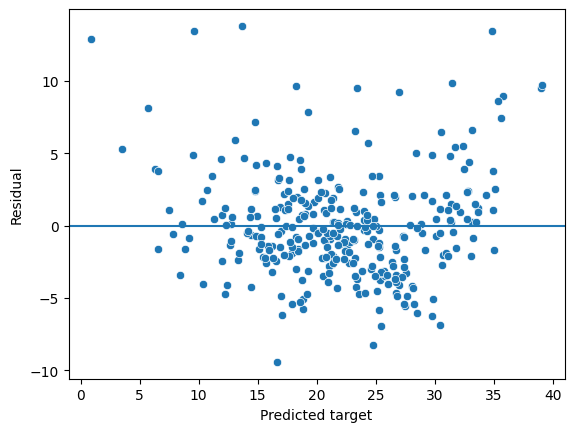

In [ ]:
# Check the residual
y_predict_train_ridge = ridge.predict(X_train.to_numpy())

residual_ridge = y_train - y_predict_train_ridge

ridge_residual = pd.DataFrame(
    {'x_axis' : y_predict_train_ridge,
     'residual' : residual_ridge})

# Plot the resiual
plot = sns.scatterplot(data = ridge_residual, x = 'x_axis', y = 'residual')
plot.set(xlabel = 'Predicted target', ylabel = 'Residual')
plt.axhline(0)

Assumptions:
1.  The relationship between variables is linear, which seems to be fine as indicated by the horizontal line y=0 representing the residual points.
2. Uncorrelated residuals between different
observations.
3. There are no noticeable patterns in the consecutive residuals.

### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the r2 score and rmse for ridge regression with alpha = 10
accuracy_list_ridge = []
for i in range(len(X)):
    y_predict = ridge.predict(X[i])
    r2 = r2_score(y[i], y_predict)
    rmse = np.sqrt(mean_squared_error(y[i], y_predict))
    mae = mean_absolute_error(y[i], y_predict)
    mape = mean_absolute_percentage_error(y[i], y_predict)

    accuracy = {'Index' : index[i],
                'R-squared' : r2,
                'RMSE' : rmse,
                'MAE' : mae,
                'MAPE' : mape}

    accuracy_list_ridge.append(accuracy)

df_accuracy_ridge = pd.DataFrame(accuracy_list_ridge)

In [ ]:
df_accuracy_ridge

,Index,R-squared,RMSE,MAE,MAPE
0,Training,0.782265,3.623404,2.671235,0.136887
1,Test,0.728783,3.722263,2.831413,0.169110
2,Validation,0.694196,4.846384,3.449171,0.178520


**Interpretation:**

**R-squared**

R-squared indicates how well the model can explain the variation in the data.

- For the training dataset, the R-squared value is 0.782265, indicating that approximately 78.22% of the variance in the dependent variable is explained by the independent variables in the model. This suggests a good fit between the model and the training data, meaning the model captures a substantial portion of the variability in the data.
  
- In the test dataset, the R-squared value is 0.728783, meaning around 72.87% of the variance in the dependent variable is explained by the independent variables. Although slightly lower than the training dataset, this R-squared value still indicates a relatively good fit of the model to the test data.

- For the validation dataset, the R-squared value is 0.694196, indicating that approximately 69.42% of the variance in the dependent variable is explained by the independent variables. While this value is lower compared to the training and test datasets, it still suggests a reasonable fit of the model to the validation data.

so, we can conclude:
- The R-squared values across all datasets are relatively high, indicating that the model captures a considerable amount of the variance in the dependent variable. This suggests that the model performs well in explaining the variability in home prices based on the independent variables included in the model.
- However, there is a slight decrease in R-squared values from the training to the test and validation datasets, suggesting that the model's predictive power may decrease slightly when applied to new or unseen data. Nonetheless, the R-squared values for all datasets remain relatively high, indicating overall good performance of the model.

**RMSE, MAE, MAPE**

- The RMSE values show how much the model's predictions differ from the actual values. In this case, the RMSE for the training, test, and validation datasets are 3.623404, 3.722263, and 4.846384 respectively. These values might be considered relatively small, indicating that the model has moderate prediction errors.


- MAE tells us the average difference between predictions and actual values. For the training, test, and validation datasets, the MAE values are 2.671235, 2.831413, and 3.449171 respectively. While there are slight differences, these MAE values also tend to be low, indicating moderate prediction errors by the model.

- MAPE gives us the average percentage error. In this case, the MAPE for the training, test, and validation datasets are 0.136887, 0.169110, and 0.178520 respectively. These values are also relatively low, indicating moderate percentage errors in the model's predictions.

so, we can conclude:
- Overall, the RMSE, MAE, and MAPE values for this model can be considered good as they are relatively small.
- Among the three datasets, the validation data has the biggest RMSE, MAE, and MAPE, meaning the model's predictions are less accurate for new data. The training and test data have smaller RMSE values, showing better performance on familiar data. The validation data also has the highest MAE, indicating less accurate predictions compared to the training and test data. Additionally, the validation data has the highest MAPE, meaning a higher percentage of prediction errors for new data compared to the training and test data.

Based on the training data, the model performs well, indicating it's not underfitting. Although the R-squared value for the training data (0.782265) is higher than that for the test data (0.728783) and validation data (0.694196), the difference is not substantial. Moreover, the RMSE, MAE, and MAPE values for the test and validation data are not significantly different from those of the training data. Therefore, overall, the model does not appear to be overfitting. Hence, we have developed a reasonably good model.

## **Lasso Regression**

### **model training**

In [ ]:
from sklearn.linear_model import Lasso

alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    lasso = Lasso(alpha = al, random_state = 42)
    lasso.fit(X_train.to_numpy(), y_train.to_numpy())

    y_predict_ridge = lasso.predict(X_val.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_predict_ridge))
    print('RMSE lasso for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE lasso for alpha : 0.01, is 4.867963774404444
RMSE lasso for alpha : 0.1, is 4.881813427463958
RMSE lasso for alpha : 1, is 5.577583803488553
RMSE lasso for alpha : 10, is 5.902504917779449


We can see that Ridge with `alpha=0.01` has the smalles RMSE --> The best model

In [ ]:
lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(X_train.to_numpy(), y_train.to_numpy())

Lasso(alpha=0.01, random_state=42)

In [ ]:
# Interpreting the coefficient and intercept
coef_lasso = pd.DataFrame(
    {'intercept' : ['intercept'] + X_train.columns.to_list(),
     'coefficient' : [lasso.intercept_] + list(lasso.coef_)})
coef_lasso

,intercept,coefficient
0,intercept,24.308413
1,crim,-0.086865
2,zn,0.041048
3,indus,-0.112454
4,chas,1.197776
5,nox,-4.287524
6,rm,3.467064
7,age,-0.008216
8,dis,-1.190210
9,tax,-0.002588


Median Home Value = 24.308413 - 0.086865 CRIM + 0.041048 ZN - 0.112454 INDUS + 1.197776 CHAS - 4.287524 NOX + 3.467064 RM - 0.008216 AGE - 1.190210 DIS - 0.002588 TAX - 0.632066 PTRATIO + 0.009258 BLACK - 0.486385 ISTAT

**Interpretasi :**

- If all factors such as crime rate, proportion of residential land zoned for larger lots, industrial proportion, etc., are absent or have no effect, we would expect the median house price to be around $24.308413.

- For each unit increase in the per capita crime rate (`CRIM`), the target variable is expected to decrease by 0.086865 units, assuming other variables remain constant.
- With each unit increase in the proportion of residential land zoned for lots over 25,000 sq. ft. (`ZN`), the target variable is expected to increase by 0.041048 units, assuming other variables remain constant.
- Each unit increase in the proportion of non-retail business acres per town (`INDUS`) is associated with a decrease of 0.112454 units in the target variable, assuming other variables remain constant.
- The presence of the Charles River (`CHAS`) in the vicinity, as represented by a dummy variable, increases the target variable by 1.197776 units, assuming other variables remain constant.
- An increase of one unit in the nitric oxides concentration (`NOX`) results in a decrease of 4.287524 units in the target variable, assuming other variables remain constant.
- For each additional room on average per dwelling (`RM`), the target variable is expected to increase by 3.467064 units, assuming other variables remain constant.
- Each unit increase in the proportion of owner-occupied units built before 1940 (`AGE`) is associated with a decrease of 0.008216 units in the target variable, assuming other variables remain constant.
- With each unit increase in the weighted distances to five Boston employment centers (`DIS`), the target variable is expected to decrease by 1.190210 units, assuming other variables remain constant.
- For each unit increase in the full-value property-tax rate per $10,000 (`TAX`), the target variable is expected to decrease by 0.002588 units, assuming other variables remain constant.
- An increase of one unit in the pupil-teacher ratio by town (`PTRATIO`) results in a decrease of 0.632066 units in the target variable, assuming other variables remain constant.
- With each unit increase in the proportion of blacks by town (`BLACK`), the target variable is expected to increase by 0.009258 units, assuming other variables remain constant.
- Each unit increase in the percentage of lower status of the population (`LSTAT`) leads to a decrease of 0.486385 units in the target variable, assuming other variables remain constant.

### **Model Diagnostic**

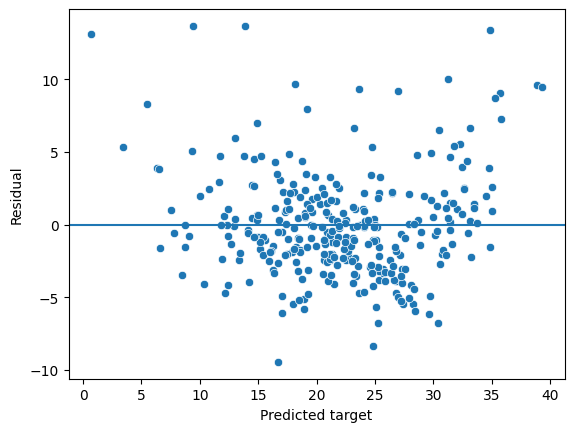

In [ ]:
# Check the residual
y_predict_train_lasso = lasso.predict(X_train.to_numpy())

residual_lasso = y_train - y_predict_train_lasso

lasso_residual = pd.DataFrame(
    {'x_axis' : y_predict_train_lasso,
     'residual' : residual_lasso})

# Plot the resiual
plot = sns.scatterplot(data = lasso_residual, x = 'x_axis', y = 'residual')
plot.set(xlabel = 'Predicted target', ylabel = 'Residual')
plt.axhline(0)

Assumptions:

The above plot shows that there is no clear pattern, and that the points are randomly and uniformly scattered on the x axist, and therefore the linearity assumption is satisfied.

### **Model Evaluation**

In [ ]:
# Calculate the r2 score and rmse for ridge regression with alpha = 10
accuracy_list_lasso = []
for i in range(len(X)):
    y_predict = lasso.predict(X[i])
    r2 = r2_score(y[i], y_predict)
    rmse = np.sqrt(mean_squared_error(y[i], y_predict))
    mae = mean_absolute_error(y[i], y_predict)
    mape = mean_absolute_percentage_error(y[i], y_predict)

    accuracy = {'Index' : index[i],
                'R-squared' : r2,
                'RMSE' : rmse,
                'MAE' : mae,
                'MAPE' : mape}

    accuracy_list_lasso.append(accuracy)

df_accuracy_lasso = pd.DataFrame(accuracy_list_lasso)

In [ ]:
df_accuracy_lasso

,Index,R-squared,RMSE,MAE,MAPE
0,Training,0.781656,3.628474,2.676281,0.137223
1,Test,0.725575,3.744207,2.841554,0.170028
2,Validation,0.691467,4.867964,3.459525,0.180247


**R-squared**  

- For the training dataset, the R-squared value is 0.781656, indicating that approximately 78.17% of the variance in the dependent variable is explained by the independent variables in the model. This suggests a good fit between the model and the training data, meaning the model captures a substantial portion of the variability in the data.
  
- In the test dataset, the R-squared value is 0.725575, meaning around 72.56% of the variance in the dependent variable is explained by the independent variables. Although slightly lower than the training dataset, this R-squared value still indicates a relatively good fit of the model to the test data.

- For the validation dataset, the R-squared value is 0.691467, indicating that approximately 69.15% of the variance in the dependent variable is explained by the independent variables. While this value is lower compared to the training and test datasets, it still suggests a reasonable fit of the model to the validation data.

so, we can conclude:
- The R-squared values across all datasets are relatively high, indicating that the model captures a considerable amount of the variance in the dependent variable. This suggests that the model performs well in explaining the variability in home prices based on the independent variables included in the model.
- However, there is a slight decrease in R-squared values from the training to the test and validation datasets, suggesting that the model's predictive power may decrease slightly when applied to new or unseen data. Nonetheless, the R-squared values for all datasets remain relatively high, indicating overall good performance of the model.

**RMSE, MAE, MAPE**

- In this case, the RMSE for the training, test, and validation datasets are show the values considered relatively small, indicating that the model has moderate prediction errors.


- While there are slight differences, MAE values also tend to be low, indicating moderate prediction errors by the model.

- MAPE values are also relatively low, indicating moderate percentage errors in the model's predictions.

so, we can conclude:
- Overall, the RMSE, MAE, and MAPE values for this model can be considered good as they are relatively small.
- Among the three datasets, the validation data has the biggest RMSE, MAE, and MAPE, meaning the model's predictions are less accurate for new data. The training and test data have smaller RMSE values, showing better performance on familiar data. The validation data also has the highest MAE, indicating less accurate predictions compared to the training and test data. Additionally, the validation data has the highest MAPE, meaning a higher percentage of prediction errors for new data compared to the training and test data.

Based on the training data, the model performs well, indicating it's not underfitting. Although the R-squared value for the training data (0.781656) is higher than that of the test data (0.725575) and validation data (0.691467), the difference is not substantial. Additionally, the RMSE, MAE, and MAPE values for the test and validation data are not significantly different from those of the training data. Therefore, overall, this model does not appear to be overfitting or underfitting. Thus, we have developed a reasonably good model.

### **Conclusion**

After reevaluating the models, if we find that Ridge Regression and Lasso Regression perform similarly and Ridge Regression has the lowest error, then selecting Ridge Regression as the preferred model is reasonable. Opting for the model with the lowest error, in this case, Ridge Regression, is a sensible decision when both models demonstrate comparable performance. This approach ensures that we choose the most accurate model among the options available.

Additionally, while Linear Regression may achieve a low error and roughly similar accuracy to Ridge and Lasso Regression, it may not suffice as a suitable model for predicting this dataset due to its limitations. Linear regression is prone to underfitting compared to Ridge and Lasso models. Hence, Ridge Regression emerges as the best model for predicting the median value of houses (MEDV) in this context.